<a href="https://colab.research.google.com/github/Rk-Pudasaini/Data_Analysis/blob/main/Kalimati_tarkari_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
df = pd.read_csv('/content/Kalimati_Tarkari_Dataset.csv')
df.head()

<ipython-input-19-c96113591e49>:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Kalimati_Tarkari_Dataset.csv')


,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,Tomato Small(Local),6/16/2013,Kg,26,32,29.0
2,Potato Red,6/16/2013,Kg,20,21,20.5
3,Potato White,6/16/2013,Kg,15,16,15.5
4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.0


In [20]:
df.tail()

,Commodity,Date,Unit,Minimum,Maximum,Average
280857,Tomato Small(Indian),9/28/2023,KG,Rs 45.00,Rs 55.00,Rs 50.00
280858,Tomato Small(Local),9/28/2023,KG,Rs 50.00,Rs 60.00,Rs 55.00
280859,Tomato Small(Tunnel),9/28/2023,KG,Rs 60.00,Rs 75.00,Rs 69.00
280860,Turnip A,9/28/2023,KG,Rs 70.00,Rs 80.00,Rs 75.00
280861,Water Melon(Green),9/28/2023,KG,Rs 50.00,Rs 60.00,Rs 56.67


In [21]:
df.shape

(280862, 6)

In [22]:
df.dtypes

Commodity    object
Date         object
Unit         object
Minimum      object
Maximum      object
Average      object
dtype: object

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df.dtypes

Commodity            object
Date         datetime64[ns]
Unit                 object
Minimum              object
Maximum              object
Average              object
dtype: object

In [25]:
df.isna().sum()

Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [26]:
df.shape

(280862, 6)

In [27]:
total_commodities = df['Commodity'].unique()

# Now total_commodities contains an array of unique commodity names
print(f'Total Number of Commodities sold in Kalimati tarkari bazar: {len(total_commodities)}')
print(total_commodities)


Total Number of Commodities sold in Kalimati tarkari bazar: 136
['Tomato Big(Nepali)' 'Tomato Small(Local)' 'Potato Red' 'Potato White'
 'Onion Dry (Indian)' 'Carrot(Local)' 'Cabbage(Local)' 'Cauli Local'
 'Raddish Red' 'Raddish White(Local)' 'Brinjal Long' 'Brinjal Round'
 'Cow pea(Long)' 'Green Peas' 'French Bean(Local)' 'Soyabean Green'
 'Bitter Gourd' 'Bottle Gourd' 'Pointed Gourd(Local)' 'Snake Gourd'
 'Smooth Gourd' 'Sponge Gourd' 'Pumpkin' 'Squash(Long)' 'Turnip' 'Okara'
 'Christophine' 'Brd Leaf Mustard' 'Spinach Leaf' 'Cress Leaf'
 'Mustard Leaf' 'Fenugreek Leaf' 'Onion Green' 'Mushroom(Kanya)'
 'Asparagus' 'Neuro' 'Brocauli' 'Sugarbeet' 'Drumstick' 'Red Cabbbage'
 'Lettuce' 'Celery' 'Parseley' 'Fennel Leaf' 'Mint' 'Turnip A' 'Tamarind'
 'Bamboo Shoot' 'Tofu' 'Gundruk' 'Apple(Jholey)' 'Banana' 'Lime'
 'Pomegranate' 'Mango(Maldah)' 'Grapes(Green)' 'Water Melon(Green)'
 'Sweet Orange' 'Pineapple' 'Cucumber(Local)' 'Jack Fruit'
 'Papaya(Nepali)' 'Sugarcane' 'Ginger' 'Chilli Dry' 

In [12]:
sorted_commodities = sorted(total_commodities)
print(sorted_commodities)

['Amla', 'Apple(Fuji)', 'Apple(Jholey)', 'Arum', 'Asparagus', 'Avocado', 'Bakula', 'Bamboo Shoot', 'Banana', 'Barela', 'Bauhania flower', 'Bitter Gourd', 'Bottle Gourd', 'Brd Leaf Mustard', 'Brinjal Long', 'Brinjal Round', 'Brocauli', 'Cabbage', 'Cabbage(Local)', 'Cabbage(Terai)', 'Capsicum', 'Carrot(Local)', 'Carrot(Terai)', 'Cauli Local', 'Cauli Local(Jyapu)', 'Cauli Terai', 'Celery', 'Chilli Dry', 'Chilli Green', 'Chilli Green(Akbare)', 'Chilli Green(Bullet)', 'Chilli Green(Machhe)', 'Christophine', 'Clive Dry', 'Clive Green', 'Coriander Green', 'Cow pea(Long)', 'Cowpea(Short)', 'Cress Leaf', 'Cucumber(Hybrid)', 'Cucumber(Local)', 'Drumstick', 'Fennel Leaf', 'Fenugreek Leaf', 'Fish Fresh', 'Fish Fresh(Bachuwa)', 'Fish Fresh(Chhadi)', 'Fish Fresh(Mungari)', 'Fish Fresh(Rahu)', 'French Bean(Hybrid)', 'French Bean(Local)', 'French Bean(Rajma)', 'Garlic Dry Chinese', 'Garlic Dry Nepali', 'Garlic Green', 'Ginger', 'Grapes(Black)', 'Grapes(Green)', 'Green Peas', 'Guava', 'Gundruk', 'Jack 

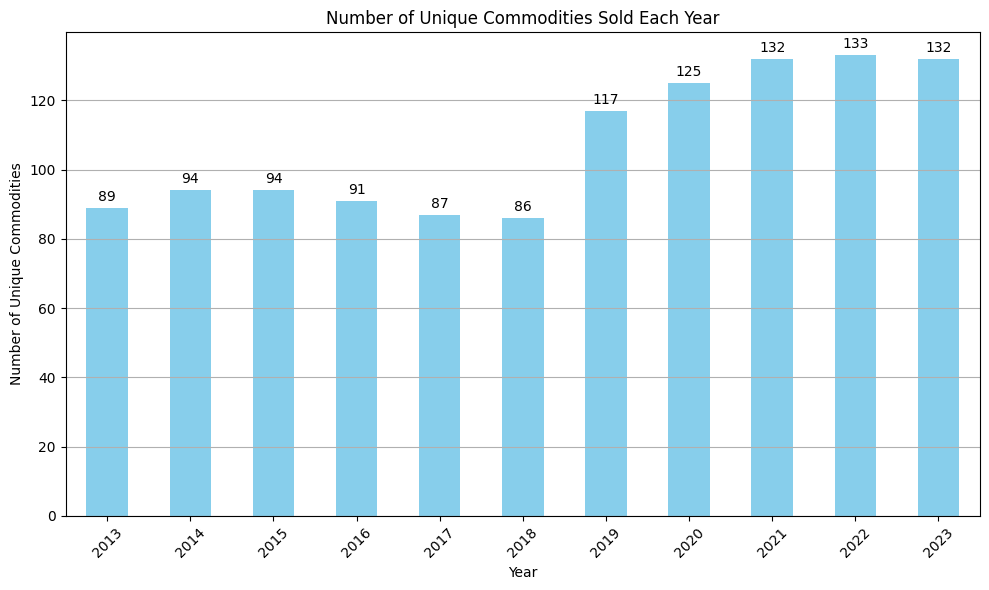

In [31]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by year and count the number of unique commodities sold each year
commodities_per_year = df.groupby(df['Date'].dt.year)['Commodity'].nunique()

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = commodities_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Commodities Sold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Commodities')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines only on the y-axis

# Annotate each bar with its count value
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.show()
